In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform data quality checks by checking for missing values, if any.

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

2. Understand what factors contributed most to employee turnover at EDA.
2.1. Draw a heatmap of the correlation matrix between all numerical 
features or columns in the data.
2.2. Draw the distribution plot of:
■ Employee Satisfaction (use column satisfaction_level)
■ Employee Evaluation (use column last_evaluation)
■ Employee Average Monthly Hours (use column 
average_montly_hours)
2.3. Draw the bar plot of the employee project count of both employees
who left and stayed in the organization (use column number_project 
and hue column left), and give your inferences from the plot.

In [6]:
data1 = data.iloc[:,0:8]

In [7]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [8]:
df2 = data1.corr()

<Axes: >

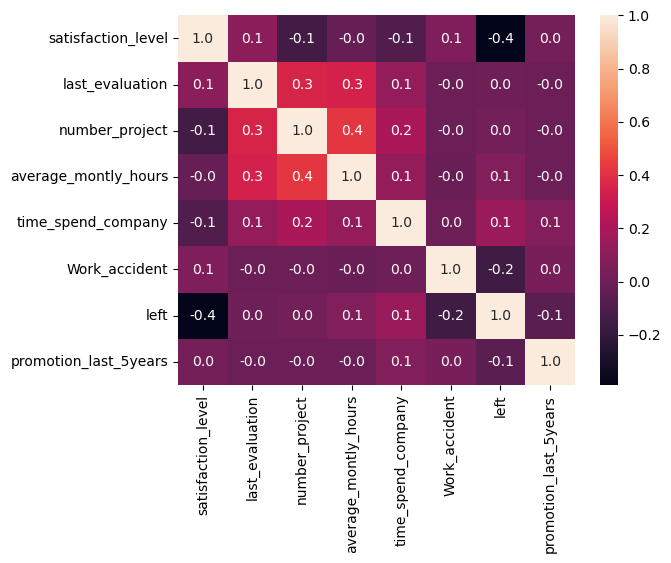

In [9]:
sns.heatmap(df2, annot=True, fmt=".1f")

<Axes: xlabel='satisfaction_level', ylabel='Count'>

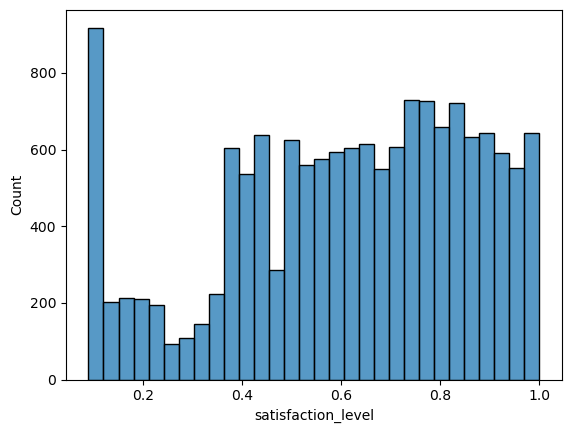

In [10]:
sns.histplot(data['satisfaction_level'])

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

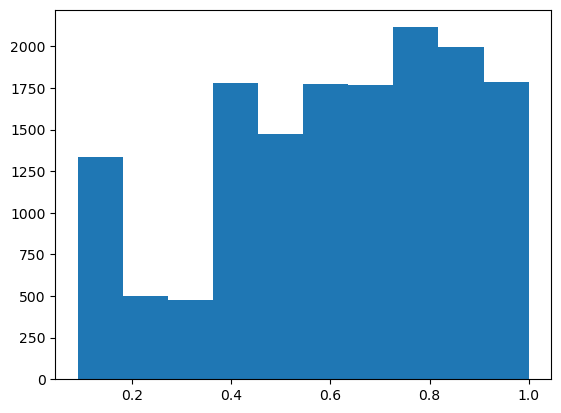

In [11]:
plt.hist(data['satisfaction_level'])

<Axes: xlabel='last_evaluation', ylabel='Count'>

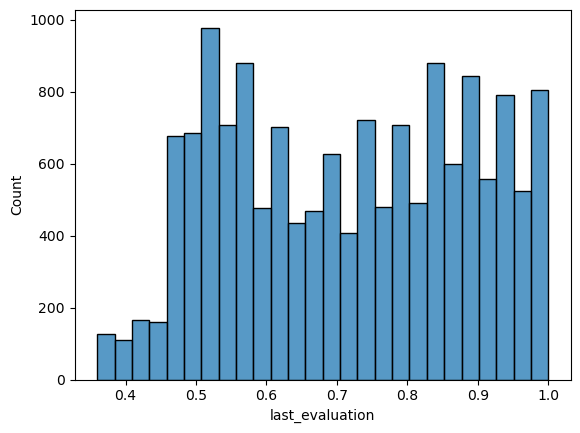

In [12]:
sns.histplot(data['last_evaluation'])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

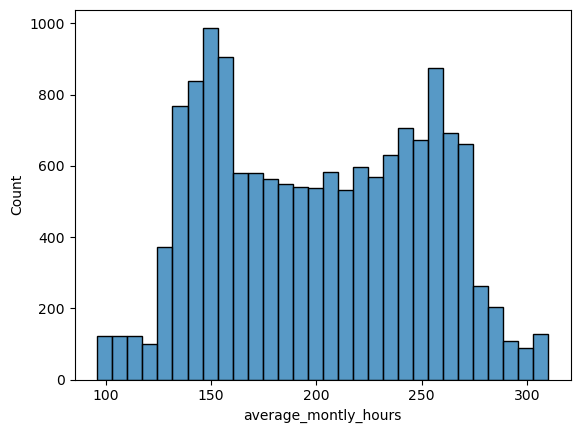

In [13]:
sns.histplot(data['average_montly_hours'])

In [14]:
data['number_project'].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

<Axes: xlabel='number_project', ylabel='count'>

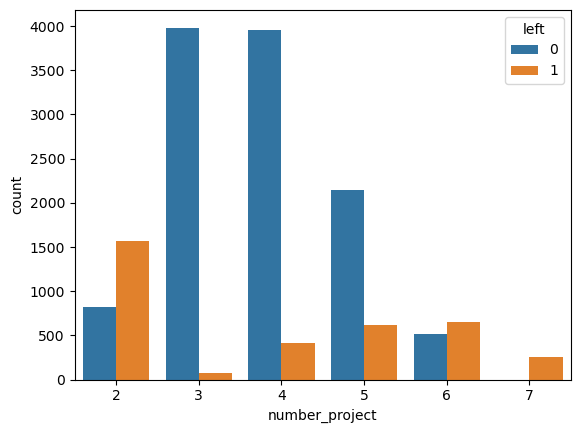

In [15]:
sns.countplot(data , x = data['number_project'], hue = data['left'] )

## inferences on above graph

1. generally very low and high productivity employees are those who left(i.e between 2 and (6-7))
2. only employees with avg. projects stayed (i.e between 3-5)
3. the total count of employees who left are much lesser than who stayed.

In [16]:
data2 = pd.get_dummies(data[['sales', 'salary']], drop_first= True)

In [17]:
data2.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,False


3. Perform clustering of employees who left based on their satisfaction and 
evaluation.
3.1. Choose columns satisfaction_level, last_evaluation, and left.
3.2. Do K-means clustering of employees who left the company into 3 
clusters?
3.3. Based on the satisfaction and evaluation factors, give your thoughts 
on the employee clusters.


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

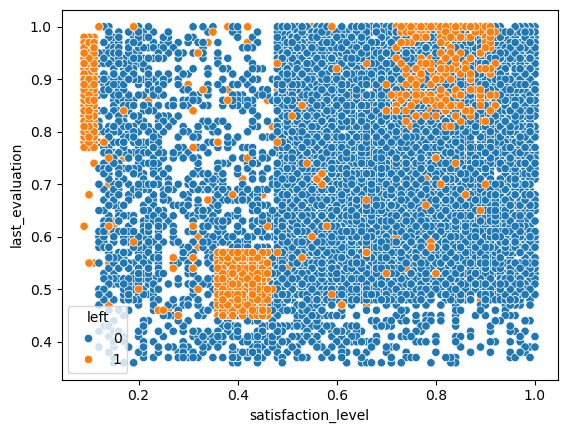

In [18]:
sns.scatterplot(data = data , x = 'satisfaction_level', y = 'last_evaluation' , hue = 'left')

In [19]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 3 , random_state = 42)
data1['cluster'] = kmeans.fit_predict(data1[['satisfaction_level', 'last_evaluation' ,  'left']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

data1['cen_x'] = data1.cluster.map({0: cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data1['cen_y'] = data1.cluster.map({0: cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
data1['c'] = data1.cluster.map({0: colors[0], 1:colors[1], 2:colors[2]})

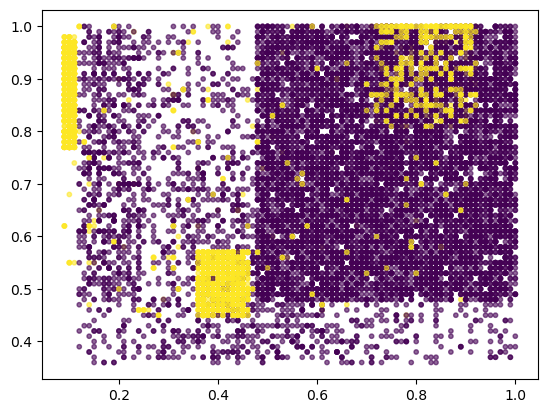

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x = data1.satisfaction_level ,y =  data1.last_evaluation , c = data1.left , alpha = 0.6, s=10)
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\kmeans.png')

#inferences
1. there are 3 clusters of employee leaving , 
first = with low satisfaction and high last last evaluation,
second = with high satisfaction and high last last evaluation
third = with low satisfaction and low last last evaluation 
2. employee stayed are concentrated above satisfaction of 0.5
3. These inferences can help your HR team focus on improving job satisfaction and addressing the concerns of high-performing employees to reduce turnover

4. Handle the left Class Imbalance using the SMOTE technique.
4.1. Pre-process the data by converting categorical columns to numerical 
columns by:
■ Separating categorical variables and numeric variables
■ Applying get_dummies() to the categorical variables
■ Combining categorical variables and numeric variables
4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 
with random_state=123.
4.3. Upsample the train dataset using the SMOTE technique from the 
imblearn module.

In [21]:
data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
data1 = data.iloc[:,0:8]
data2 = pd.get_dummies(data[['sales', 'salary']], drop_first= True , dtype = 'int64')
data2.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [23]:
data = pd.concat([data1, data2], axis = 1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
x = data.drop(['left'], axis = 1)
y = data['left']

In [25]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
# Separate features and target
x = data.drop("left", axis=1)
y = data["left"]

# Stratified train-test split
sss = StratifiedShuffleSplit(test_size=0.2, random_state=123)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# SMOTE oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [28]:
x_train_resampled.value_counts()
y_train_resampled.value_counts()

left
0    9142
1    9142
Name: count, dtype: int64

5. Perform 5-fold cross-validation model training and evaluate performance.
5.1. Train a logistic regression model, apply a 5-fold CV, and plot the 
classification report.
5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot 
the classification report.
5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and 
plot the classification report.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score , RepeatedKFold
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
model = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits=5, random_state=123)
scores = []
for train_index, test_index in cv.split(x_train_resampled, y_train_resampled):
    x_train_fold, x_test_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    model

In [32]:
model.fit(x_train_fold, y_train_fold)
y_pred = model.predict(x_test_fold)
print(classification_report(y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       915
           1       0.76      0.81      0.79       914

    accuracy                           0.78      1829
   macro avg       0.78      0.78      0.78      1829
weighted avg       0.78      0.78      0.78      1829



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


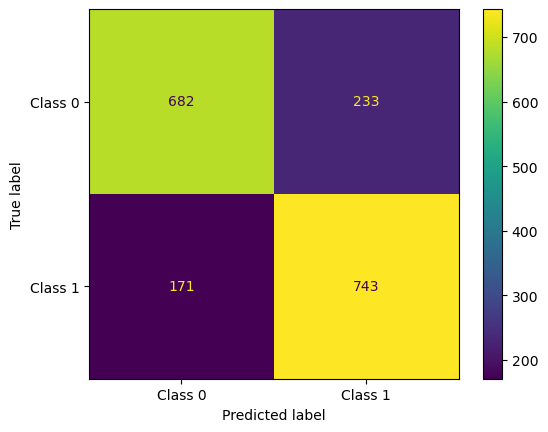

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# As model already trained your classifier (model)
cm = confusion_matrix(y_test_fold, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

In [34]:
## RandomForestClassifier

In [35]:
model2 = RandomForestClassifier()
cv2 = StratifiedShuffleSplit(n_splits=5, random_state=123)
scores = []
for train_index, test_index in cv.split(x_train_resampled, y_train_resampled):
    x_train_fold, x_test_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    model2

In [36]:
model2.fit(x_train_fold, y_train_fold)
y_pred = model2.predict(x_test_fold)
print(classification_report(y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       915
           1       0.99      0.97      0.98       914

    accuracy                           0.98      1829
   macro avg       0.98      0.98      0.98      1829
weighted avg       0.98      0.98      0.98      1829



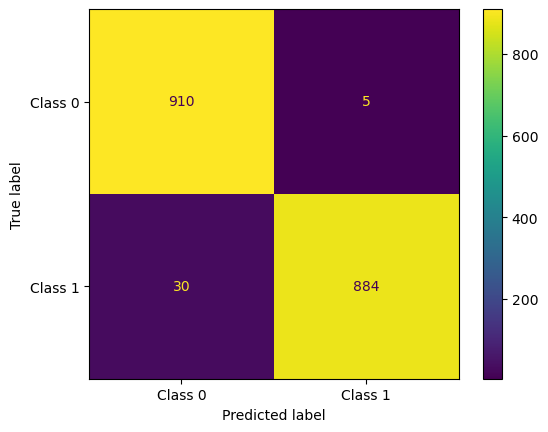

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# As model already trained your classifier (model)
cm = confusion_matrix(y_test_fold, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

In [38]:
## GradientBoostingClassifier

In [39]:
model3 = GradientBoostingClassifier()
cv3 = StratifiedShuffleSplit(n_splits=5, random_state=123)
scores = []
for train_index, test_index in cv.split(x_train_resampled, y_train_resampled):
    x_train_fold, x_test_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    model3

In [40]:
model3.fit(x_train_fold, y_train_fold)
y_pred = model3.predict(x_test_fold)
print(classification_report(y_test_fold, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       915
           1       0.97      0.94      0.95       914

    accuracy                           0.96      1829
   macro avg       0.96      0.96      0.96      1829
weighted avg       0.96      0.96      0.96      1829



6. Identify the best model and justify the evaluation metrics used.
6.1. Find the ROC/AUC for each model and plot the ROC curve.
6.2. Find the confusion matrix for each of the models.
6.3. Explain which metric needs to be used from the confusion matrix: 
Recall or Precision?

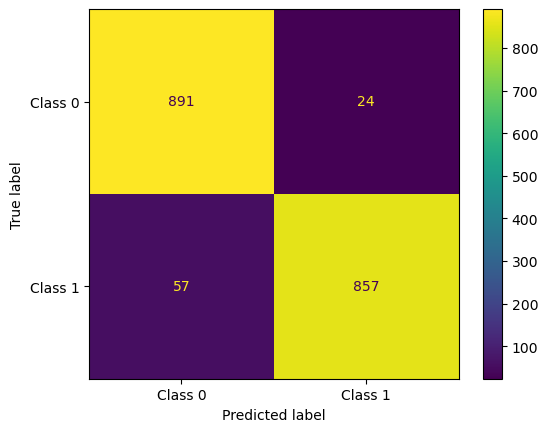

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# As model already trained your classifier (model)
cm = confusion_matrix(y_test_fold, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


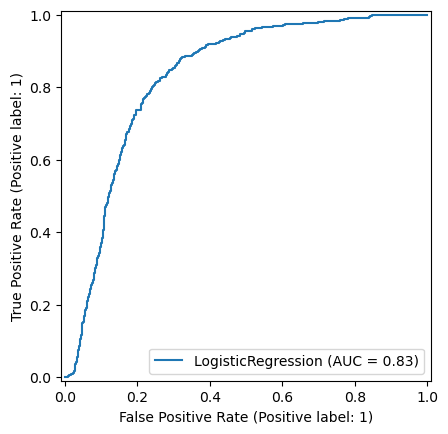

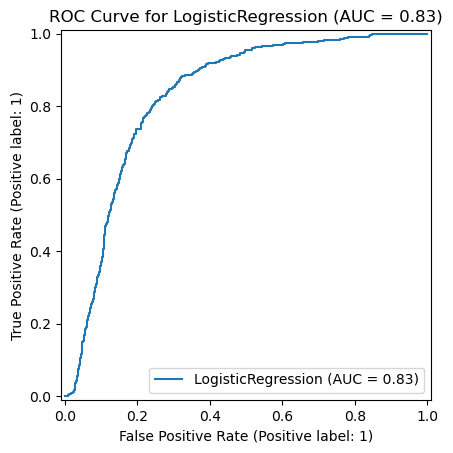

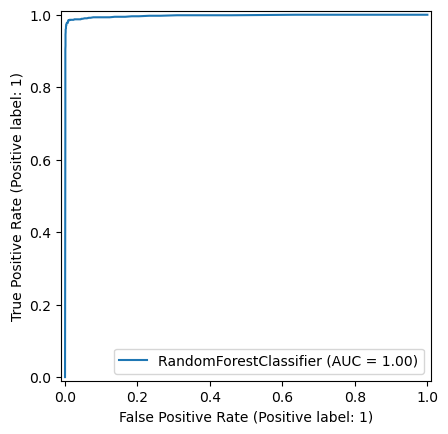

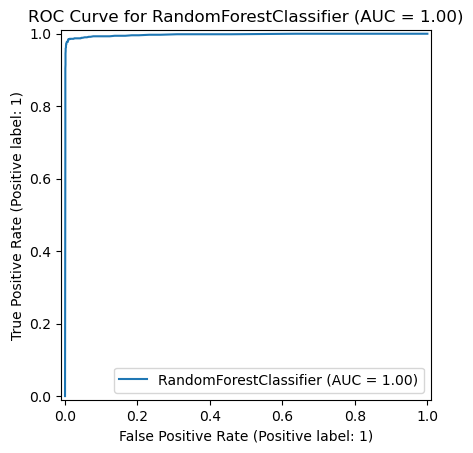

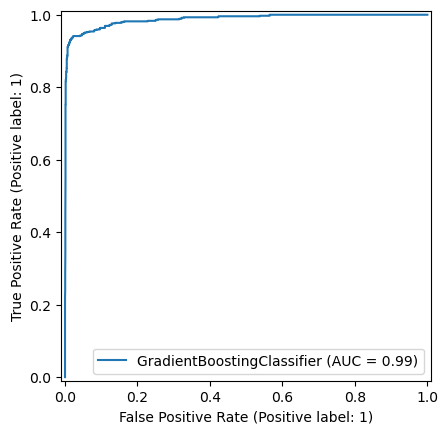

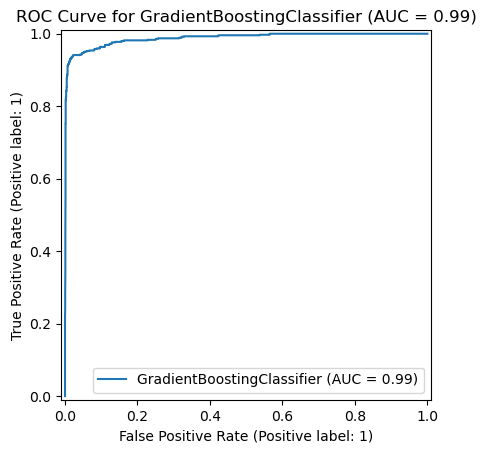

In [42]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Calculate ROC-AUC for each model
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
for model in models:
    model.fit(x_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Create a display object for plotting the ROC curve
    display = RocCurveDisplay.from_estimator(model, x_test, y_test)
    display.plot()  # Plot the ROC curve
    plt.title(f'ROC Curve for {model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.show()


In [43]:
# Using best model (replace 'best_model' with the chosen model):
y_pred_proba = model2.predict_proba(x_test)[:, 1]

green_threshold = 0.2
yellow_threshold = 0.6
orange_threshold = 0.9

if (y_pred_proba < green_threshold).any():
    print("Safe Zone (Green): no policy change and intervention. Keep boosting morale and reviewing.")

elif ((y_pred_proba >= green_threshold) & (y_pred_proba < yellow_threshold)).any():
    print("Low Risk Zone (Yellow): Investigate dissatisfaction causes. One on One discussion.")

elif ((y_pred_proba >= yellow_threshold) & (y_pred_proba < orange_threshold)).any():
    print("Medium Risk Zone (Orange): Initiate  action to retain . Focus on excess workload. Address specific concerns, offer interesting projects, foriegn trips.")

elif (y_pred_proba >= orange_threshold).any():
    print("High Risk Zone (Red): Take urgent action. Work with the employee to resolve issues, and offer attractive incentives to stay, overseas placement.")

Safe Zone (Green): no policy change and intervention. Keep boosting morale and reviewing.


In [44]:
## Based on above Models , i think we need to focus on Precision of data to correctly target employees to reduce wastage of resources